<a href="https://colab.research.google.com/github/UdeS-PMF/gmq710_test/blob/develop/Pratique_avec_le_transfer_learning_(Mobilenet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mise en place du Transfer Learning sur des données de télédétection

On va créer un jeu de données (imagettes de la ville de Sherbrooke - Sentinel 2). On va définir des classes : Urbain, Végétation et Eau. On va créer des imagettes de 50 x 50 pixels, et on attribue une classe (majoritaire).

On va se baser sur le réseau MobileNet (léger). On va ré-entraîner les dernières couches pour permettre l'identification des classes définies ci-dessus.

On peut aussi utiliser ResNet (Residual Network) qui est un peu plus complexe.

## Importation
On importe les libriaires

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.applications.mobilenet import MobileNet

from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing import image

import numpy as np

On va décompresser le fichier zip (obtenir le fichier zip ici : https://drive.google.com/file/d/1J-LOnxbrXN5Rcux1_PyCdEIqkywiAypt/view?usp=sharing)

In [ ]:
!unzip /content/sherbrooke-tl.zip

Archive:  /content/sherbrooke-tl.zip
  inflating: test/IMG-600.png        
  inflating: test/IMG-601.png        
  inflating: test/IMG-602.png        
  inflating: test/IMG-603.png        
  inflating: test/IMG-604.png        
  inflating: test/IMG-605.png        
  inflating: test/IMG-606.png        
  inflating: test/IMG-607.png        
  inflating: test/IMG-608.png        
  inflating: test/IMG-609.png        
  inflating: test/IMG-610.png        
  inflating: test/IMG-611.png        
  inflating: test/IMG-612.png        
  inflating: test/IMG-613.png        
  inflating: test/IMG-614.png        
  inflating: test/IMG-615.png        
  inflating: test/IMG-616.png        
  inflating: test/IMG-617.png        
  inflating: test/IMG-618.png        
  inflating: test/IMG-619.png        
  inflating: test/IMG-620.png        
  inflating: test/IMG-621.png        
  inflating: test/IMG-622.png        
  inflating: test/IMG-623.png        
  inflating: test/IMG-624.png        
  inflating: 

## Vérification des images
On peut vérifier le contenu des images

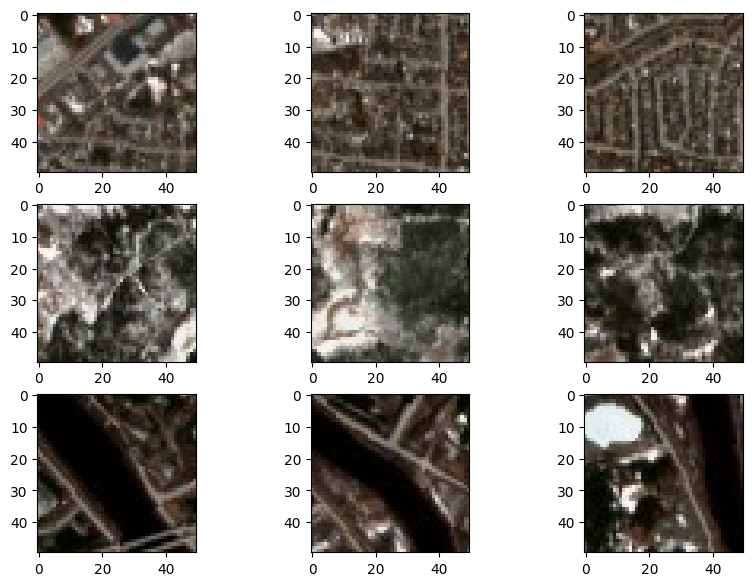

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,7))
plt.subplot(3, 3, 1)
plt.imshow(mpimg.imread('/content/train/urban/IMG-1014.png'))
plt.subplot(3, 3, 2)
plt.imshow(mpimg.imread('/content/train/urban/IMG-1015.png'))
plt.subplot(3, 3, 3)
plt.imshow(mpimg.imread('/content/train/urban/IMG-1016.png'))
plt.subplot(3, 3, 4)
plt.imshow(mpimg.imread('/content/train/vegetation/IMG-1009.png'))
plt.subplot(3, 3, 5)
plt.imshow(mpimg.imread('/content/train/vegetation/IMG-1010.png'))
plt.subplot(3, 3, 6)
plt.imshow(mpimg.imread('/content/train/vegetation/IMG-1011.png'))
plt.subplot(3, 3, 7)
plt.imshow(mpimg.imread('/content/train/water/IMG-126.png'))
plt.subplot(3, 3, 8)
plt.imshow(mpimg.imread('/content/train/water/IMG-177.png'))
plt.subplot(3, 3, 9)
plt.imshow(mpimg.imread('/content/train/water/IMG-227.png'))


## Construction du réseau
On débute avec le réseau MobileNet et on modifie légèrement les couches finales.

In [ ]:
nbclasses = 3 # on souhaite 3 classes
# image size : 224, 224, 3 -> c'est la taille demandée par imagenet
base_model=MobileNet(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) #on récupère MobileNet.
# on ajoute quelques couches
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(nbclasses,activation='softmax')(x) #final layer with softmax activation


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


On récupère notre nouveau réseau

In [ ]:
model=Model(inputs=base_model.input,outputs=preds)

On affiche l'architecture du réseau

In [ ]:
for i,layer in enumerate(model.layers):
    print(i,layer.name)

0 input_layer
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_

On va faire en sorte que les dernières couches seront ré-entraînables.

In [ ]:
for layer in model.layers:
    layer.trainable=False # l'ensemble des couches ne doivent pas changer
# seulement les dernières couches
for layer in model.layers[-20:]:
    layer.trainable=True # simplement les 20 dernières couches

On peut définir la création de nos jeux d'entraînement. On utilise le répertoire train et en plus on permet de modifier l'allure des images pour créer de nouveaux exemples.

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=5,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                   brightness_range=[0.2,0.8])  # brightness
train_generator=train_datagen.flow_from_directory('/content/train/',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

label_map = (train_generator.class_indices)
print(label_map)

Found 207 images belonging to 3 classes.
{'urban': 0, 'vegetation': 1, 'water': 2}


On définit l'apprentissage.

In [ ]:
model.compile(optimizer ='rmsprop',
                   loss ='categorical_crossentropy',
                   metrics =['accuracy'])

On va déclencher l'apprentissage

In [ ]:
step_size_train = train_generator.n // train_generator.batch_size
# on envoie le générateur
model.fit(train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 993ms/step - accuracy: 0.3305 - loss: 2.5666
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7812 - loss: 0.5080 
Epoch 3/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.7261 - loss: 0.5595
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8438 - loss: 0.3357 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8117 - loss: 0.4621
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7188 - loss: 0.6148 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8663 - loss: 0.3406
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6250 - loss: 0.9261 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8516 - loss: 0.3277
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8125 - loss: 0.3986 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9074 - loss: 0.2990
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8750 - loss: 0.4368 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9412 - loss: 0.2059
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.2472 
Epoch 15/5

## Vérification sur les autres images

On teste nos imagettes.

In [ ]:
import glob
import os
#load the images
images = sorted(glob.glob('/content/test/*.png'))

imagesresu = {
    'IMG-600.png': 'water',
    'IMG-601.png': 'vegetation',
    'IMG-602.png': 'urban',
    'IMG-603.png': 'urban',
    'IMG-604.png': 'urban',
    'IMG-605.png': 'vegetation',
    'IMG-606.png': 'vegetation',
    'IMG-607.png': 'vegetation',
    'IMG-608.png': 'vegetation',
    'IMG-609.png': 'vegetation',
    'IMG-610.png': 'vegetation',
    'IMG-611.png': 'urban',
    'IMG-612.png': 'urban',
    'IMG-613.png': 'urban',
    'IMG-614.png': 'urban',
    'IMG-615.png': 'urban',
    'IMG-616.png': 'urban',
    'IMG-617.png': 'urban',
    'IMG-618.png': 'urban',
    'IMG-619.png': 'urban',
    'IMG-620.png': 'urban',
    'IMG-621.png': 'urban',
    'IMG-622.png': 'urban',
    'IMG-623.png': 'urban',
    'IMG-624.png': 'urban',
    'IMG-625.png': 'urban',
    'IMG-626.png': 'urban'
}


for filename in images:

    img = image.load_img(filename,  target_size=(224, 224))

    x = image.img_to_array(img)

    x = np.expand_dims(x, axis=0)

    npimg = np.vstack([x])
    classes = model.predict(npimg)

    y_classes = classes.argmax(axis=-1)
    print("Le fichier %s est dans la catégorie %s (étiquette initiale : %s)" % (filename, list(label_map.keys())[y_classes[0]] , imagesresu[os.path.basename(filename)]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Le fichier /content/test/IMG-600.png est dans la catégorie vegetation (étiquette initiale : water)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Le fichier /content/test/IMG-601.png est dans la catégorie vegetation (étiquette initiale : vegetation)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Le fichier /content/test/IMG-602.png est dans la catégorie vegetation (étiquette initiale : urban)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Le fichier /content/test/IMG-603.png est dans la catégorie vegetation (étiquette initiale : urban)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Le fichier /content/test/IMG-604.png est dans la catégorie vegetation (étiquette initiale : urban)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Le fichier /content/test/IMG-605.png est dans la catégorie vegetation (étiquette initiale : vegetation)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Le fichier /content/test/IMG-606.png est dans la catégorie vegetation (étiquette initiale : vegetation)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

# Sauvegarde du modèle
On conserve l'apprentissage pour les utiliser dans une application.

In [ ]:
model.save('ia_sherbrooke.h5')

# Chargement des poids du réseau (structure)
On n'a plus besoin de faire l'apprentissage, on utilise un réseau entrainé.

In [ ]:
from tensorflow import keras
newmodel = keras.models.load_model('ia_sherbrooke.h5')

On peut maintenant utiliser le réseau entrainé.

In [ ]:
import glob
import os
#load the images
images = sorted(glob.glob('/content/test/*.png'))

labels = {'urban': 0, 'vegetation': 1, 'water': 2}

for filename in images:

    img = image.load_img(filename,  target_size=(224, 224))

    x = image.img_to_array(img)

    x = np.expand_dims(x, axis=0)

    npimg = np.vstack([x])
    classes = newmodel.predict(npimg)

    y_classes = classes.argmax(axis=-1)
    print("Le fichier %s est dans la catégorie %s " % (filename, list(labels.keys())[y_classes[0]]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Le fichier /content/test/IMG-600.png est dans la catégorie vegetation 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Le fichier /content/test/IMG-601.png est dans la catégorie vegetation 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Le fichier /content/test/IMG-602.png est dans la catégorie vegetation 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Le fichier /content/test/IMG-603.png est dans la catégorie vegetation 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Le fichier /content/test/IMG-604.png est dans la catégorie vegetation 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Le fichier /content/test/IMG-605.png est dans la catégorie vegetation 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Le fichier /content/test/IMG-606.png est dans la catégorie vegetation 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Le fichier /content/test/IMG-607.png est dans la catégorie vegetation 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Le fichier /content/test/IMG-608.png est dans la catégorie vegetation 
1/1 ━━━━━━━━━━━━━━━━━

On peut tester une scène sentinel

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from osgeo import gdal

labels = {'urban': 0, 'vegetation': 1, 'water': 2}
# Charger le modèle pré-entraîné
model = load_model('ia_sherbrooke.h5')  # Remplacez 'votre_modele.h5' par le chemin de votre modèle

# Charger votre grande image satellitaire au format TIFF
image_path = '/content/sentinel_export.tif'  # Remplacez 'votre_image_satellitaire.tif' par le chemin de votre image TIFF
ds = gdal.Open(image_path)
large_image = ds.ReadAsArray().transpose(1, 2, 0)
ds = None  # Fermer le fichier TIFF

# Définir la taille de la fenêtre glissante (ou de la tuile)
window_size = (224, 224)

# Diviser l'image en tuiles
height, width, _ = large_image.shape
stride = 100  # Ajustez la taille de la stride selon vos besoins
tiles = []
for y in range(0, height, stride):
    for x in range(0, width, stride):
        tile = large_image[y:y+window_size[0], x:x+window_size[1]]
        tiles.append(tile)


# Appliquer le modèle à chaque tuile
predictions = []
for tile in tiles:

    # Effectuer la prédiction
    prediction = model.predict(np.expand_dims(tile, axis=0))
    predictions.append(np.argmax(prediction, axis=-1))

# Reconstruire l'image à partir des prédictions
output_image = np.zeros_like(large_image, dtype=np.uint8)
class_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # Couleurs pour les classes 'urban': 0, 'vegetation': 1, 'water': 2

idx = 0
for y in range(0, height, stride):
    for x in range(0, width, stride):
        class_prediction = int(predictions[idx])
        color = class_colors[class_prediction]
        output_image[y:y+window_size[0], x:x+window_size[1]] = color
        idx += 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━

<ipython-input-19-2957bc0dd1d9>:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_prediction = int(predictions[idx])


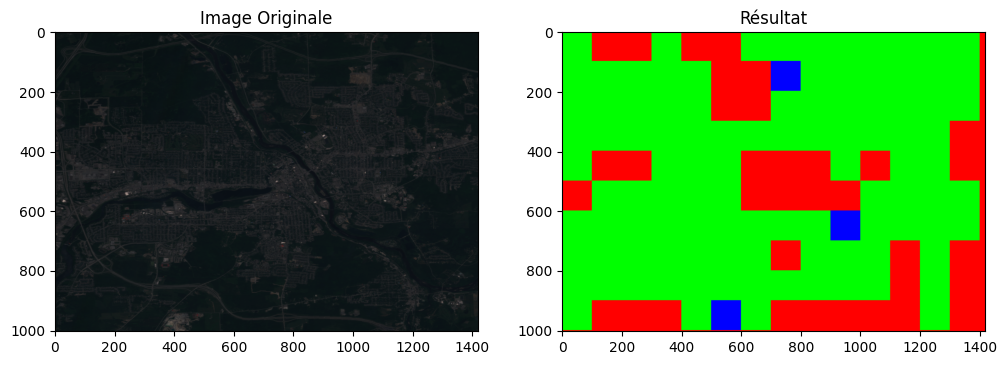

In [ ]:
import matplotlib.pyplot as plt

# Afficher les images dans Colab
plt.figure(figsize=(12, 6))

# Afficher l'image originale
plt.subplot(1, 2, 1)
plt.imshow(large_image)
plt.title('Image Originale')

# Afficher l'image résultante
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Résultat')

plt.show()